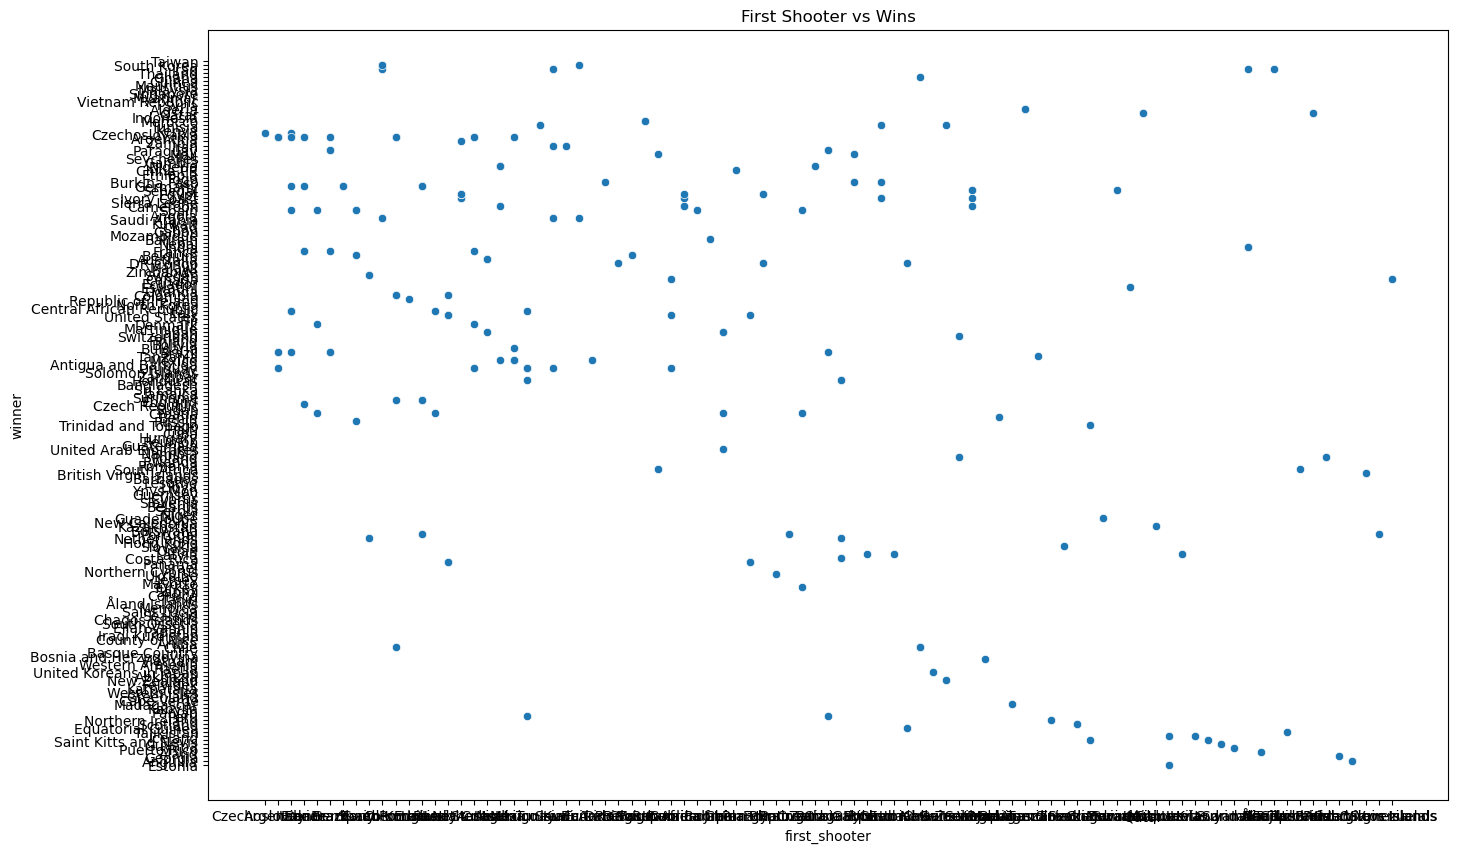

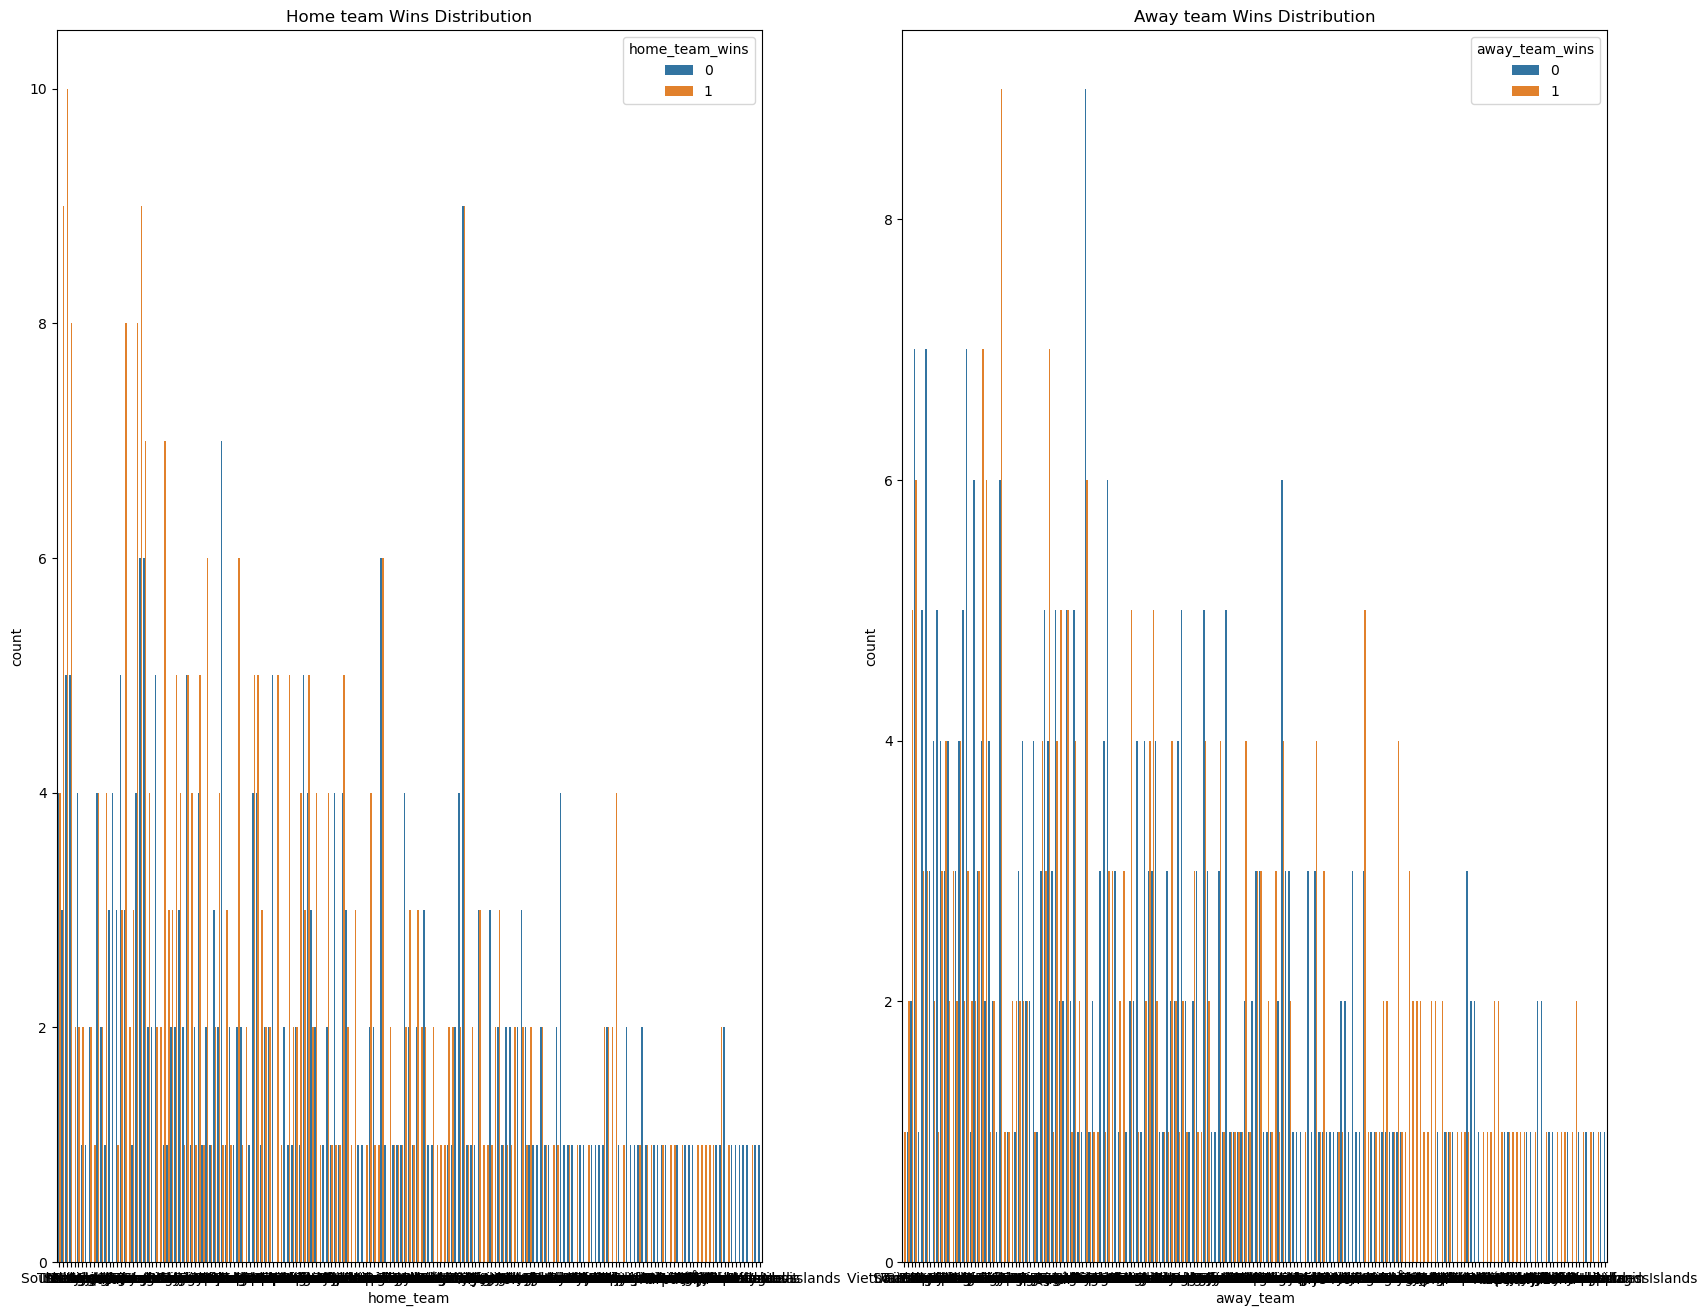

Pearson Correlation (Home team First Shooter vs Wins): -0.0010
Spearman Correlation (Home team First Shooter vs Wins): -0.0010
Chi-square Test p-value: 1.0


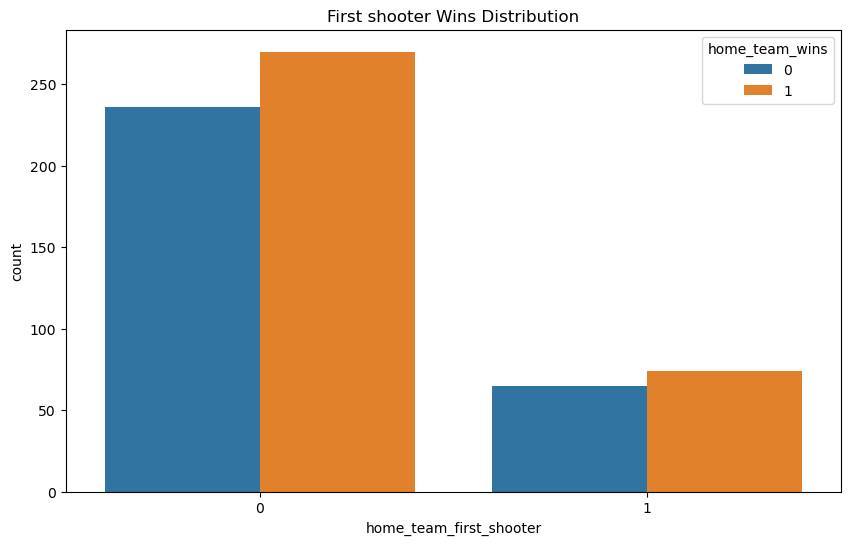

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from scipy.stats import chi2_contingency


#Defining the data frame for the shootout raw data set
df = pd.read_csv('https://raw.githubusercontent.com/pnandini-sdu/sp25-aai500-group2/refs/heads/main/Data/shootouts.csv')


# Create binary columns
df['home_team_wins'] = (df['winner'] == df['home_team']).astype(int)
df['away_team_wins'] = (df['winner'] == df['away_team']).astype(int)
df['home_team_first_shooter'] = (df['first_shooter'] == df['home_team']).astype(int)
df['away_team_first_shooter'] = (df['first_shooter'] == df['away_team']).astype(int)
df['winner_first_shooter'] = (df['winner'] == df['first_shooter']).astype(int)

# Write the DataFrame to a CSV file
df.to_csv('project_output_shooter.csv', index=False)  # index=False to avoid writing row numbers

#Plotting a scatter plot for first shooter and wins
plt.figure(figsize=(16,10))
sns.scatterplot(x=df['first_shooter'], y=df['winner'])
plt.title('First Shooter vs Wins')
plt.show()

# Bar plot for home/away wins
plt.figure(figsize=(20,16))
plt.subplot(1,2,1)
sns.countplot(data=df, x='home_team', hue='home_team_wins')
plt.title('Home team Wins Distribution')
plt.subplot(1,2,2)
sns.countplot(data=df, x='away_team', hue='away_team_wins')
plt.title('Away team Wins Distribution')
plt.show()


# Bar plot for First shooter vs Winner
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='home_team_first_shooter', hue='home_team_wins')
plt.title('First shooter Wins Distribution')

# Pearson correlation
pearson_corr, _ = pearsonr(df['home_team_first_shooter'], df['home_team_wins'])
print(f"Pearson Correlation (Home team First Shooter vs Wins): {pearson_corr :.4f}")

# Spearman correlation
spearman_corr, _ = spearmanr(df['home_team_first_shooter'], df['home_team_wins'])
print(f"Spearman Correlation (Home team First Shooter vs Wins): {spearman_corr :.4f}")


# Create a contingency table
contingency_table = pd.crosstab(df['home_team_first_shooter'], df['home_team_wins'])

# Chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square Test p-value: {p}")
